In [18]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
from nltk import PorterStemmer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
train_data.columns = train_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

test_data = pd.read_csv('test.csv')
test_data.columns = test_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

train_org = train_data.copy()
test_org = test_data.copy()

train_data.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [3]:
test_data.head()

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [4]:
test_data['retweet_count'] = test_data['retweet_count'].fillna(test_data['retweet_count'].mode()[0])
combine_data = train_data.append(test_data, ignore_index = True, sort = True)
combine_data.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class
0,1.245025e+18,en,BeenXXPired,Happy #MothersDay to all you amazing mothers o...,0,0.0
1,1.245759e+18,en,FestiveFeeling,Happy Mothers Day Mum - I'm sorry I can't be t...,1,0.0
2,1.246087e+18,en,KrisAllenSak,Happy mothers day To all This doing a mothers ...,0,-1.0
3,1.244803e+18,en,Queenuchee,Happy mothers day to this beautiful woman...ro...,0,0.0
4,1.244876e+18,en,brittan17446794,Remembering the 3 most amazing ladies who made...,0,-1.0


In [5]:
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, "", text)
    return text

In [11]:
combine_data['original_text'] = np.vectorize(remove_pattern)(combine_data['original_text'], "@[\w]*")
combine_data['original_text'] = np.vectorize(remove_pattern)(combine_data['original_text'], "#[\w]*")
combine_data['original_text'] = np.vectorize(remove_pattern)(combine_data['original_text'], '[0-9]')
combine_data['original_text'] = combine_data['original_text'].str.replace("[^a-zA-Z#]", " ")
combine_data.loc[(combine_data['lang'] != 'en'), 'lang'] = 'en'
combine_data['original_text'] = combine_data['original_text'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 3]))
combine_data['lang'] = combine_data['lang'].astype(str)
combine_data.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class
0,1.245025e+18,en,BeenXXPired,Happy amazing mothers there know hard being ab...,0,0.0
1,1.245759e+18,en,FestiveFeeling,Happy Mothers sorry there bring Mothers flower...,1,0.0
2,1.246087e+18,en,KrisAllenSak,Happy mothers This doing mothers days work Tod...,0,-1.0
3,1.244803e+18,en,Queenuchee,Happy mothers this beautiful woman royalty soo...,0,0.0
4,1.244876e+18,en,brittan17446794,Remembering most amazing ladies made late gran...,0,-1.0


In [12]:
tweet = combine_data['original_text'].apply(lambda x: x.split())
tweet.head()

0    [Happy, amazing, mothers, there, know, hard, b...
1    [Happy, Mothers, sorry, there, bring, Mothers,...
2    [Happy, mothers, This, doing, mothers, days, w...
3    [Happy, mothers, this, beautiful, woman, royal...
4    [Remembering, most, amazing, ladies, made, lat...
Name: original_text, dtype: object

In [13]:
ps = PorterStemmer()
tweet = tweet.apply(lambda x: [ps.stem(i) for i in x])
tweet.head()

0    [happi, amaz, mother, there, know, hard, be, a...
1    [happi, mother, sorri, there, bring, mother, f...
2    [happi, mother, thi, do, mother, day, work, to...
3    [happi, mother, thi, beauti, woman, royalti, s...
4    [rememb, most, amaz, ladi, made, late, grandmo...
Name: original_text, dtype: object

In [14]:
for i in range(len(tweet)):
    tweet[i] = ' '.join(tweet[i])
combine_data['original_text'] = tweet
combine_data.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class
0,1.245025e+18,en,BeenXXPired,happi amaz mother there know hard be abl your ...,0,0.0
1,1.245759e+18,en,FestiveFeeling,happi mother sorri there bring mother flower c...,1,0.0
2,1.246087e+18,en,KrisAllenSak,happi mother thi do mother day work today been...,0,-1.0
3,1.244803e+18,en,Queenuchee,happi mother thi beauti woman royalti sooth mu...,0,0.0
4,1.244876e+18,en,brittan17446794,rememb most amaz ladi made late grandmoth iri ...,0,-1.0


In [20]:
neutralWords = ' '.join(text for text in combine_data['original_text'][combine_data['sentiment_class'] == 0])
positiveWords = ' '.join(text for text in combine_data['original_text'][combine_data['sentiment_class'] == 1])
negativeWords = ' '.join(text for text in combine_data['original_text'][combine_data['sentiment_class'] == -1])

In [21]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(positiveWords)

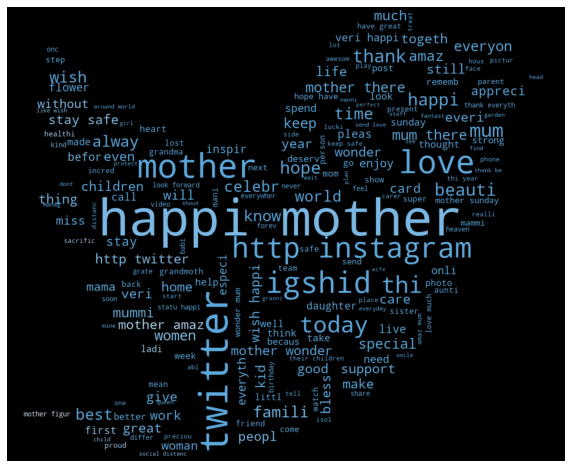

In [22]:
# Size of the image generated 
plt.figure(figsize=(10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")

plt.axis('off')
plt.show()

In [ ]:
combine_data.drop(combine_data[combine_data.original_author.apply(lambda x: x.isnumeric())].index, inplace = True)
print(combine_data.shape)
combine_data['retweet_count'] = combine_data['retweet_count'].apply(pd.to_numeric, errors = 'coerce')
combine_data.drop(combine_data[(combine_data.retweet_count.isnull())].index, inplace = True)
print(combine_data.shape)

In [ ]:
combine_data.head()

In [ ]:
test_org.loc[test_org.retweet_count.isnull()]

In [ ]:
combine_data.retweet_count.unique()

In [ ]:
combine_data.loc[(combine_data['lang'].isnull()), 'lang'] = 'en'
combine_data.loc[(combine_data['retweet_count'].isnull())]

In [ ]:
test_data[test_data.original_author.apply(lambda x: x.isnumeric())]

In [ ]:
for column in combine_data.select_dtypes(include=['category']).columns:
    combine_data[column] = combine_data[column].apply(lambda x: x.upper())

In [ ]:
for column in combine_data.select_dtypes(include=['category']).columns:
    print(column)